In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [2]:
 def load_application_train():
        data = pd.read_csv("datasets/application_train.csv")
        return data

In [3]:
df2 = load_application_train()
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
def load_titanic():
    data = pd.read_csv("datasets/titanic.csv")
    return data

In [5]:
df = load_titanic()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Aykırı Değer Yakalama

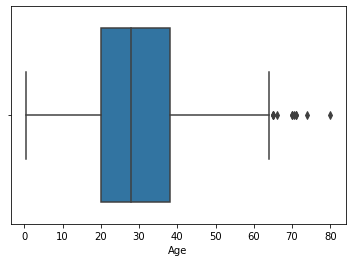

In [6]:
sns.boxplot(x = df["Age"])
plt.show()

In [7]:
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr

df[(df["Age"] < low) | (df["Age"] > up)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [8]:
df[(df["Age"] < low) | (df["Age"] > up)].index

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [9]:
def outlier_threshold(dataframe, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1 
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [10]:
low, up = outlier_threshold(df, "Age")

In [11]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_threshold(dataframe, col_name)
    if dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name]> up_limit)].any(axis = None):
        return True
    else:
        return False

In [12]:
check_outlier(df, "Age")

True

In [13]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th
                  and dataframe[col].dtypes != "O" ]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th
                  and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat  
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
         
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]


    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


    
    return cat_cols, num_cols , cat_but_car

In [14]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [15]:
num_cols = [col for col in num_cols if col not in "PassengerId"]

In [16]:
for col in num_cols:
    print(col, check_outlier(df,col))

Age True
Fare True


In [17]:
cat_cols, num_cols, cat_but_car = grab_col_names(df2)

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [18]:
num_cols = [col for col in num_cols if col not in "SK_ID_CURR"]

In [19]:
for col in num_cols:
    print(col, check_outlier(df2,col))

CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE True
NONLIVINGAPARTMENTS_MODE True
NONLIVINGAREA_MODE True
APARTMENTS_MEDI True
BASEMENTAREA_MEDI 

In [20]:
# Aykırı Değerlerin Kendilerini Yakalamak

In [21]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_threshold(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

df_outlier = grab_outliers(df, "Age")

df_outlier




     PassengerId  Survived  Pclass                            Name   Sex  \
33            34         0       2           Wheadon, Mr. Edward H  male   
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male   
96            97         0       1       Goldschmidt, Mr. George B  male   
116          117         0       3            Connors, Mr. Patrick  male   
280          281         0       3                Duane, Mr. Frank  male   

      Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   66.0      0      0  C.A. 24579  10.5000   NaN        S  
54   65.0      0      1      113509  61.9792   B30        C  
96   71.0      0      0    PC 17754  34.6542    A5        C  
116  70.5      0      0      370369   7.7500   NaN        Q  
280  65.0      0      0      336439   7.7500   NaN        Q  


In [22]:
grab_outliers(df, "Age", True)

     PassengerId  Survived  Pclass                            Name   Sex  \
33            34         0       2           Wheadon, Mr. Edward H  male   
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male   
96            97         0       1       Goldschmidt, Mr. George B  male   
116          117         0       3            Connors, Mr. Patrick  male   
280          281         0       3                Duane, Mr. Frank  male   

      Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   66.0      0      0  C.A. 24579  10.5000   NaN        S  
54   65.0      0      1      113509  61.9792   B30        C  
96   71.0      0      0    PC 17754  34.6542    A5        C  
116  70.5      0      0      370369   7.7500   NaN        Q  
280  65.0      0      0      336439   7.7500   NaN        Q  


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [23]:
age_outlier_index = grab_outliers(df, "Age", True)
age_outlier_index

     PassengerId  Survived  Pclass                            Name   Sex  \
33            34         0       2           Wheadon, Mr. Edward H  male   
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male   
96            97         0       1       Goldschmidt, Mr. George B  male   
116          117         0       3            Connors, Mr. Patrick  male   
280          281         0       3                Duane, Mr. Frank  male   

      Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   66.0      0      0  C.A. 24579  10.5000   NaN        S  
54   65.0      0      1      113509  61.9792   B30        C  
96   71.0      0      0    PC 17754  34.6542    A5        C  
116  70.5      0      0      370369   7.7500   NaN        Q  
280  65.0      0      0      336439   7.7500   NaN        Q  


Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [24]:
# Aykırı Değerleri Silme İşlemi

In [25]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_threshold(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [26]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "PassangerID"]
print("DF shape =", df.shape)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4
DF shape = (891, 12)


In [27]:
for col in num_cols:
    new_df = remove_outlier(df, col)

In [28]:
print(df.shape[0] - new_df.shape[0])

116


In [29]:
# Baskılama Yöntemi (re-assignment w,th thresholds)

In [30]:
def replace_with_threshold(dataframe,veriable):
    low_limit, up_limit = outlier_threshold(dataframe, veriable)
    dataframe.loc[(dataframe[veriable] < low_limit),veriable] = low_limit
    dataframe.loc[(dataframe[veriable] > up_limit),veriable] = up_limit

In [31]:
for col in num_cols:
    print(col , check_outlier(df,col))

PassengerId False
Age True
Fare True


In [32]:
for col in num_cols:
    replace_with_threshold(df,col)

In [33]:
for col in num_cols:
    print(col , check_outlier(df,col))

PassengerId False
Age False
Fare False


In [34]:
# Çok Değişkenli Aykırı Değerler

In [35]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [36]:
for col in df.columns:
    print(col,check_outlier(df,col))

carat True
depth True
table True
price True
x True
y True
z True


In [37]:
low, up = outlier_threshold(df,'carat')
df[((df['carat'] < low) | (df['carat'] > up ))].shape

(1889, 7)

In [38]:
low, up = outlier_threshold(df,'depth')
df[((df['depth'] < low) | (df['depth'] > up ))].shape

(2545, 7)

In [39]:
clf = LocalOutlierFactor(n_neighbors = 20)
clf.fit_predict(df)

df_scores = clf.negative_outlier_factor_ #hepsi negatif değerler
# df_scores = -df_scores böyle çevirebiliriz.


In [40]:
np.sort(df_scores)[0:5]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092])

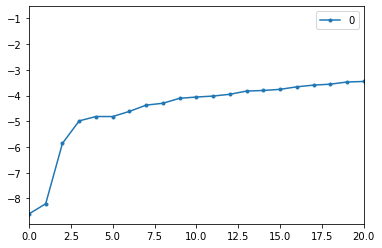

In [41]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked = True, xlim = [0, 20], style = '.-')
plt.show()

In [42]:
threshold = np.sort(df_scores)[3]

In [43]:
df[df_scores < threshold]

,carat,depth,table,price,x,y,z
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [44]:
df[df_scores < threshold].drop(inplace =True, axis = 0, labels = df[df_scores < threshold].index)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
# Eksik Verileri Yakalama

In [46]:
df = load_titanic()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df.isnull().values.any()

True

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
df[df.isnull().any(axis = 1)] # En az bir tane eksik olan satırları getir.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [51]:
na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
print(na_cols)

['Age', 'Cabin', 'Embarked']


In [52]:
def missing_values_table(dataframe, na_name = False):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [53]:
missing_values_table(df,True)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22


['Age', 'Cabin', 'Embarked']

In [54]:
# 1. Çözüm Hızlıca Silebiliriz

In [55]:
df.dropna().shape

(183, 12)

In [56]:
# 2. Çözüm Basit Atamalar Yapabiliriz

In [57]:
df["Age"].fillna(df["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [58]:
dff = df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)

In [59]:
dff.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
df["Embarked"].fillna(df["Embarked"].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [61]:
df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x,axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [62]:
# Kategorik Değişken Kırılımda Değer Atama

In [63]:
df.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [64]:
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean"))

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
# 3 Tahmine Dayalı Atama ile Doldurma

In [67]:
cat_cols, num_col, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [68]:
num_cols = [col for col in num_col if col not in "PassangerId"]

In [69]:
dff = pd.get_dummies(df[cat_cols + num_cols], drop_first=True)

In [70]:
scaler = MinMaxScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)

In [71]:
# KNN Imputer ile verileri doldurma

In [72]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dff = pd.DataFrame(imputer.fit_transform(dff), columns = dff.columns)

In [73]:
dff = pd.DataFrame(scaler.inverse_transform(dff),columns=dff.columns)

In [74]:
dff

,Survived,Pclass,SibSp,Parch,PassengerId,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,3.0,1.0,0.0,1.0,22.0,7.2500,1.0,0.0,1.0
1,1.0,1.0,1.0,0.0,2.0,38.0,71.2833,0.0,0.0,0.0
2,1.0,3.0,0.0,0.0,3.0,26.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,1.0,0.0,4.0,35.0,53.1000,0.0,0.0,1.0
4,0.0,3.0,0.0,0.0,5.0,35.0,8.0500,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,0.0,0.0,887.0,27.0,13.0000,1.0,0.0,1.0
887,1.0,1.0,0.0,0.0,888.0,19.0,30.0000,0.0,0.0,1.0
888,0.0,3.0,1.0,2.0,889.0,28.2,23.4500,0.0,0.0,1.0
889,1.0,1.0,0.0,0.0,890.0,26.0,30.0000,1.0,0.0,0.0


In [75]:
# Eksik Değerlerin Bağımlı Değişken ile İlişkisinin İncelenmesi

In [76]:
missing_values_table(df, True)
na_cols = missing_values_table(df, True)


def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")


missing_vs_target(df, "Survived", na_cols)

          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22
          n_miss  ratio
Cabin        687  77.10
Age          177  19.87
Embarked       2   0.22
             TARGET_MEAN  Count
Age_NA_FLAG                    
0               0.406162    714
1               0.293785    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                 0.666667    204
1                 0.299854    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                    0.382452    889
1                    1.000000      2




In [77]:
# Encoder İşlemleri

In [78]:
df = load_titanic()

In [79]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [80]:
# cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [81]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [82]:
df = one_hot_encoder(df, ohe_cols, True)

In [83]:
df

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,...,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,NaN,1,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,B42,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.4500,NaN,0,1,...,0,0,0,1,0,0,0,0,0,1
889,890,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C148,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# Rare Encoding 

In [85]:
# Kategorik değişkenlerin azlık çokluk durumunun analiz edilmesi.

In [86]:
df = load_application_train()

In [87]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [88]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

In [89]:
for col in cat_cols:
    cat_summary(df,col)

                 NAME_CONTRACT_TYPE      Ratio
Cash loans                   278232  90.478715
Revolving loans               29279   9.521285
##########################################
     CODE_GENDER      Ratio
F         202448  65.834393
M         105059  34.164306
XNA            4   0.001301
##########################################
   FLAG_OWN_CAR      Ratio
N        202924  65.989184
Y        104587  34.010816
##########################################
   FLAG_OWN_REALTY      Ratio
Y           213312  69.367275
N            94199  30.632725
##########################################
                 NAME_TYPE_SUITE      Ratio
Unaccompanied             248526  80.818572
Family                     40149  13.056118
Spouse, partner            11370   3.697429
Children                    3267   1.062401
Other_B                     1770   0.575589
Other_A                      866   0.281616
Group of people              271   0.088127
##########################################
         

   FLAG_DOCUMENT_16     Ratio
0            304458  99.00719
1              3053   0.99281
##########################################
   FLAG_DOCUMENT_17      Ratio
0            307429  99.973334
1                82   0.026666
##########################################
   FLAG_DOCUMENT_18      Ratio
0            305011  99.187021
1              2500   0.812979
##########################################
   FLAG_DOCUMENT_19     Ratio
0            307328  99.94049
1               183   0.05951
##########################################
   FLAG_DOCUMENT_20     Ratio
0            307355  99.94927
1               156   0.05073
##########################################
   FLAG_DOCUMENT_21      Ratio
0            307408  99.966505
1               103   0.033495
##########################################
     AMT_REQ_CREDIT_BUREAU_HOUR      Ratio
0.0                      264366  85.969608
1.0                        1560   0.507299
2.0                          56   0.018211
3.0                  

In [90]:
# Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi.

In [91]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")


In [92]:
rare_analyser(df, "TARGET", cat_cols)

NAME_CONTRACT_TYPE : 2
                     COUNT     RATIO  TARGET_MEAN
NAME_CONTRACT_TYPE                               
Cash loans          278232  0.904787     0.083459
Revolving loans      29279  0.095213     0.054783


CODE_GENDER : 3
              COUNT     RATIO  TARGET_MEAN
CODE_GENDER                               
F            202448  0.658344     0.069993
M            105059  0.341643     0.101419
XNA               4  0.000013     0.000000


FLAG_OWN_CAR : 2
               COUNT     RATIO  TARGET_MEAN
FLAG_OWN_CAR                               
N             202924  0.659892     0.085002
Y             104587  0.340108     0.072437


FLAG_OWN_REALTY : 2
    COUNT     RATIO  TARGET_MEAN
N   94199  0.306327     0.083249
Y  213312  0.693673     0.079616


NAME_TYPE_SUITE : 7
                  COUNT     RATIO  TARGET_MEAN
Children           3267  0.010624     0.073768
Family            40149  0.130561     0.074946
Group of people     271  0.000881     0.084871
Other_A           

1       2  0.000007     0.000000


FLAG_DOCUMENT_13 : 2
    COUNT     RATIO  TARGET_MEAN
0  306427  0.996475     0.080916
1    1084  0.003525     0.027675


FLAG_DOCUMENT_14 : 2
    COUNT     RATIO  TARGET_MEAN
0  306608  0.997064     0.080869
1     903  0.002936     0.033223


FLAG_DOCUMENT_15 : 2
    COUNT    RATIO  TARGET_MEAN
0  307139  0.99879     0.080791
1     372  0.00121     0.029570


FLAG_DOCUMENT_16 : 2
    COUNT     RATIO  TARGET_MEAN
0  304458  0.990072     0.081046
1    3053  0.009928     0.049132


FLAG_DOCUMENT_17 : 2
    COUNT     RATIO  TARGET_MEAN
0  307429  0.999733     0.080744
1      82  0.000267     0.024390


FLAG_DOCUMENT_18 : 2
    COUNT    RATIO  TARGET_MEAN
0  305011  0.99187     0.080925
1    2500  0.00813     0.056800


FLAG_DOCUMENT_19 : 2
    COUNT     RATIO  TARGET_MEAN
0  307328  0.999405     0.080738
1     183  0.000595     0.065574


FLAG_DOCUMENT_20 : 2
    COUNT     RATIO  TARGET_MEAN
0  307355  0.999493     0.080727
1     156  0.000507     0.0833

In [93]:
# 3. Rare encoder'ın yazılması.

In [94]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [95]:
new_df = rare_encoder(df, 0.01)

In [96]:
new_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### -----------------------------------------------------------------------------------------------------

# Titanic Uçtan Uca Feature Engineering & Data Preprocessing

In [97]:
df = load_titanic()

In [98]:
df.columns = [col.upper() for col in df.columns]

In [99]:
# 1. Feature Engineering Uygulaması

In [100]:
# Cabin Bool
df["NEW_CABIN_BOOL"] = df["CABIN"].notnull().astype('int')

# Name Count
df["NEW_NAME_COUNT"] = df["NAME"].str.len()

# Name Word Count
df["NEW_NAME_WORD_COUNT"] = df["NAME"].apply(lambda x: len(str(x).split(" ")))

# Name DR
df["NEW_NAME_DR"] = df["NAME"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))

# Name Title
df["NEW_TITLE"] = df.NAME.str.extract(' ([A-Za-z]+)\.', expand = False)

# Family Size
df["NEW_FAMILY_SIZE"] = df["SIBSP"] + df["PARCH"] + 1

# Age Pclass
df["NEW_AGE_PLCASS"] = df["AGE"] * df["PCLASS"]

# Is Alone
df.loc[((df['SIBSP'] + df["PARCH"]) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df['SIBSP'] + df["PARCH"]) == 0), "NEW_IS_ALONE"] = "YES"

# age level
df.loc[(df['AGE'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['AGE'] >= 18) & (df['AGE'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['AGE'] >= 56), 'NEW_AGE_CAT'] = 'senior'

# Sex x Age
df.loc[(df['SEX'] == 'male') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'

In [101]:
# 2. Outlier (Aykırı) Değerlerinm Bulunması

In [102]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 22
cat_cols: 14
num_cols: 5
cat_but_car: 3
num_but_cat: 8


In [103]:
num_cols = [col for col in num_cols if "PASSENGERID" not in col]

In [104]:
num_cols

['AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PLCASS']

In [105]:
for col in num_cols:
    print(col, check_outlier(df,col))

AGE True
FARE True
NEW_NAME_COUNT True
NEW_AGE_PLCASS True


In [106]:
for col in num_cols:
    replace_with_threshold(df,col)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PASSENGERID          891 non-null    int64  
 1   SURVIVED             891 non-null    int64  
 2   PCLASS               891 non-null    int64  
 3   NAME                 891 non-null    object 
 4   SEX                  891 non-null    object 
 5   AGE                  714 non-null    float64
 6   SIBSP                891 non-null    int64  
 7   PARCH                891 non-null    int64  
 8   TICKET               891 non-null    object 
 9   FARE                 891 non-null    float64
 10  CABIN                204 non-null    object 
 11  EMBARKED             889 non-null    object 
 12  NEW_CABIN_BOOL       891 non-null    int32  
 13  NEW_NAME_COUNT       891 non-null    float64
 14  NEW_NAME_WORD_COUNT  891 non-null    int64  
 15  NEW_NAME_DR          891 non-null    int

In [108]:
# 3. Missing Values (Eksik Değerler)

In [109]:
missing_values_table(df)

                n_miss  ratio
CABIN              687  77.10
NEW_SEX_CAT        177  19.87
NEW_AGE_CAT        177  19.87
NEW_AGE_PLCASS     177  19.87
AGE                177  19.87
EMBARKED             2   0.22


In [110]:
df.drop("CABIN", inplace=True, axis=1)

In [111]:
remove_cols = ["TICKET","NAME"]
df.drop(remove_cols,inplace=True, axis=1)

In [112]:
df["AGE"] = df["AGE"].fillna(df.groupby("NEW_TITLE")["AGE"].transform("median"))

In [113]:
# Age Pclass
df["NEW_AGE_PLCASS"] = df["AGE"] * df["PCLASS"]

# age level
df.loc[(df['AGE'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['AGE'] >= 18) & (df['AGE'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['AGE'] >= 56), 'NEW_AGE_CAT'] = 'senior'

# Sex x Age
df.loc[(df['SEX'] == 'male') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'

In [114]:
# Kategorik değişkenleri doldurma
df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0) 

In [115]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [116]:
# 4. Label Encoding 

In [117]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [118]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df, col)

In [119]:
# 5. Rare Encoding


In [120]:
rare_analyser(df, "SURVIVED", cat_cols)

SEX : 2
   COUNT     RATIO  TARGET_MEAN
0    314  0.352413     0.742038
1    577  0.647587     0.188908


EMBARKED : 3
   COUNT     RATIO  TARGET_MEAN
C    168  0.188552     0.553571
Q     77  0.086420     0.389610
S    646  0.725028     0.339009


NEW_TITLE : 17
          COUNT     RATIO  TARGET_MEAN
Capt          1  0.001122     0.000000
Col           2  0.002245     0.500000
Countess      1  0.001122     1.000000
Don           1  0.001122     0.000000
Dr            7  0.007856     0.428571
Jonkheer      1  0.001122     0.000000
Lady          1  0.001122     1.000000
Major         2  0.002245     0.500000
Master       40  0.044893     0.575000
Miss        182  0.204265     0.697802
Mlle          2  0.002245     1.000000
Mme           1  0.001122     1.000000
Mr          517  0.580247     0.156673
Mrs         125  0.140292     0.792000
Ms            1  0.001122     1.000000
Rev           6  0.006734     0.000000
Sir           1  0.001122     1.000000


NEW_IS_ALONE : 2
   COUNT     RA

In [121]:
df = rare_encoder(df, 0.01)

In [122]:
df["NEW_TITLE"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: NEW_TITLE, dtype: int64

In [123]:
# 6. One Hot Encoding

In [124]:
ohe_cols = [ col for col in df.columns if 10 >= df[col].nunique() > 2]

In [125]:
df = one_hot_encoder(df, ohe_cols)

In [126]:
df

,PASSENGERID,SURVIVED,SEX,AGE,FARE,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PLCASS,NEW_IS_ALONE,...,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_mature,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturefemale,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,1,0,1,22.0,7.2500,0,23.0,0,66.0,0,...,0,1,0,0,0,1,0,0,0,0
1,2,1,0,38.0,65.6344,1,45.0,0,38.0,0,...,0,1,0,0,1,0,0,0,0,0
2,3,1,0,26.0,7.9250,0,22.0,0,78.0,1,...,0,1,0,0,1,0,0,0,0,0
3,4,1,0,35.0,53.1000,1,44.0,0,35.0,0,...,0,1,0,0,1,0,0,0,0,0
4,5,0,1,35.0,8.0500,0,24.0,0,105.0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,27.0,13.0000,0,21.0,0,54.0,1,...,0,1,0,0,0,1,0,0,0,0
887,888,1,0,19.0,30.0000,1,28.0,0,19.0,1,...,0,1,0,0,0,0,0,0,1,0
888,889,0,0,21.0,23.4500,0,40.0,0,63.0,0,...,0,1,0,0,0,0,0,0,1,0
889,890,1,1,26.0,30.0000,1,21.0,0,26.0,1,...,0,1,0,0,0,1,0,0,0,0


In [127]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if "PASSENGERID" not in col]

Observations: 891
Variables: 61
cat_cols: 56
num_cols: 5
cat_but_car: 0
num_but_cat: 56


In [130]:
rare_analyser(df, "SURVIVED", cat_cols)

SURVIVED : 2
   COUNT     RATIO  TARGET_MEAN
0    549  0.616162            0
1    342  0.383838            1


SEX : 2
   COUNT     RATIO  TARGET_MEAN
0    314  0.352413     0.742038
1    577  0.647587     0.188908


NEW_CABIN_BOOL : 2
   COUNT     RATIO  TARGET_MEAN
0    687  0.771044     0.299854
1    204  0.228956     0.666667


NEW_NAME_DR : 2
   COUNT     RATIO  TARGET_MEAN
0    881  0.988777      0.38252
1     10  0.011223      0.50000


NEW_IS_ALONE : 2
   COUNT     RATIO  TARGET_MEAN
0    354  0.397306     0.505650
1    537  0.602694     0.303538


PCLASS_1 : 2
   COUNT     RATIO  TARGET_MEAN
0    675  0.757576     0.305185
1    216  0.242424     0.629630


PCLASS_2 : 2
   COUNT    RATIO  TARGET_MEAN
0    707  0.79349     0.360679
1    184  0.20651     0.472826


PCLASS_3 : 2
   COUNT     RATIO  TARGET_MEAN
0    400  0.448934     0.557500
1    491  0.551066     0.242363


SIBSP_0 : 2
   COUNT     RATIO  TARGET_MEAN
0    283  0.317621     0.466431
1    608  0.682379     0.345395

In [132]:
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and
               (df[col].value_counts() / len(df) < 0.01).any(axis=None)]

In [135]:
useless_cols

['SIBSP_5',
 'SIBSP_8',
 'PARCH_3',
 'PARCH_4',
 'PARCH_5',
 'PARCH_6',
 'NEW_NAME_WORD_COUNT_9',
 'NEW_NAME_WORD_COUNT_14',
 'NEW_FAMILY_SIZE_8',
 'NEW_FAMILY_SIZE_11']

In [153]:
df.drop(useless_cols, axis=1, inplace=True)

In [154]:
# 7.Standart Scaler

In [155]:
scaler = StandardScaler()

In [156]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [157]:
df

,PASSENGERID,SURVIVED,SEX,AGE,FARE,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PLCASS,NEW_IS_ALONE,...,NEW_FAMILY_SIZE_7,NEW_AGE_CAT_mature,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturefemale,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,1,0,1,-0.560638,-0.820552,0,-0.436675,0,0.066488,0,...,0,1,0,0,0,1,0,0,0,0
1,2,1,0,0.663302,2.031623,1,2.248303,0,-0.790429,0,...,0,1,0,0,1,0,0,0,0,0
2,3,1,0,-0.254653,-0.787578,0,-0.558720,0,0.433739,1,...,0,1,0,0,1,0,0,0,0,0
3,4,1,0,0.433813,1.419297,1,2.126258,0,-0.882241,0,...,0,1,0,0,1,0,0,0,0,0
4,5,0,1,0.433813,-0.781471,0,-0.314631,0,1.260052,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,-0.178157,-0.539655,0,-0.680764,0,-0.300762,1,...,0,1,0,0,0,1,0,0,0,0
887,888,1,0,-0.790127,0.290823,1,0.173547,0,-1.371908,1,...,0,1,0,0,0,0,0,0,1,0
888,889,0,0,-0.637135,-0.029155,0,1.638081,0,-0.025324,0,...,0,1,0,0,0,0,0,0,1,0
889,890,1,1,-0.254653,0.290823,1,-0.680764,0,-1.157679,1,...,0,1,0,0,0,1,0,0,0,0


In [158]:
# 8. Model

In [159]:
y = df["SURVIVED"]
X = df.drop(["PASSENGERID", "SURVIVED"], axis=1)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
rf_model = RandomForestClassifier(random_state=46)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.8059701492537313